Copyright **`(c)`** 2023 Andrea Galella s310166

`<andrea.galella@studenti.polito.it>` or `<galella.andrea@gmail.com>`

[`https://github.com/andrea-ga/computational-intelligence`](https://github.com/andrea-ga/computational-intelligence)

References - Course repository:  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)

Free for personal or classroom use; see [`LICENSE.md`](https://github.com/andrea-ga/computational-intelligence/blob/main/LICENSE.md) for details.

# LAB10

Use reinforcement learning to devise a tic-tac-toe player.

### Deadlines:

* Submission: [Dies Natalis Solis Invicti](https://en.wikipedia.org/wiki/Sol_Invictus)
* Reviews: [Befana](https://en.wikipedia.org/wiki/Befana)

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [2]:
from itertools import combinations
from collections import namedtuple, defaultdict
from random import choice
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
State = namedtuple('State', ['x', 'o'])

In [4]:
MAGIC = [2, 7, 6,
         9, 5, 1,
         4, 3, 8]

In [5]:
def print_board(pos):
    """Nicely prints the board"""
    for r in range(3):
        for c in range(3):
            i = r * 3 + c
            if MAGIC[i] in pos.x:
                print('X', end='')
            elif MAGIC[i] in pos.o:
                print('O', end='')
            else:
                print('.', end='')
        print()
    print()

In [6]:
def win(elements):
    """Checks is elements is winning"""
    return any(sum(c) == 15 for c in combinations(elements, 3))

def state_value(pos: State):
    """Evaluate state: +1 first player wins"""
    if win(pos.x):
        return 1
    elif win(pos.o):
        return -1
    else:
        return 0

In [25]:
#Function used to draw the pie chart
def draw_pie_chart(win_rate, loss_rate, draw_rate, title):
    # Define data
    data = [win_rate, loss_rate, draw_rate]
    labels = ["Wins", "Losses", "Draws"]
    colors = ["#29F05F", "#EC3954", "#4570F8"]

    # Create a pie chart
    fig, ax = plt.subplots()
    ax.pie(data, labels=labels, colors=colors, autopct="%1.1f%%")
    ax.set_title(title)

    # Show the chart
    plt.show()

In [8]:
def select_action(Q_table, state):
    # Choose the action with the highest Q-value
    if state not in Q_table:
        Q_table[state] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

    max_Q = np.max(np.array([x for i, x in enumerate(Q_table[state]) if (i+1) not in state[0] and (i+1) not in state[1]]))
    best_actions = []

    # Get all actions that have the highest Q-value
    for i, q_value in enumerate(Q_table[state]):
        if q_value == max_Q and (i+1) not in state[0] and (i+1) not in state[1]:
            best_actions.append(i+1)

    # Randomly select one of the best actions
    action = best_actions[np.random.randint(len(best_actions))]

    return action

In [101]:
alpha = 0.3
gamma = 0.8

def update_Q_table(Q_table, state, action, reward, next_state):
    if state not in Q_table:
        Q_table[state] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    
    if next_state not in Q_table:
        Q_table[next_state] = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    
    max_next_Q = np.max(Q_table[next_state])
    #TEMPORAL DIFFERENCE
    Q_table[state][action-1] = (1 - alpha) * Q_table[state][action-1] + alpha * (reward + gamma * max_next_Q)
    #MONTE CARLO LEARNING
    #Q_table[state][action-1] = Q_table[state][action-1] + alpha * reward

## RL vs RANDOM

In [74]:
def rl_game(Q_table):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    
    while available:
        # Select an action
        action = select_action(Q_table, (frozenset(state.x), frozenset(state.o)))

        x = action
        next_state = deepcopy(state)
        next_state.x.add(x)
        trajectory.append(deepcopy(next_state))
        available.remove(x)

        reward = state_value(next_state)
        update_Q_table(Q_table, (frozenset(state.x), frozenset(state.o)), action, reward, (frozenset(next_state.x), frozenset(next_state.o)))

        state = next_state

        if available:
            o = choice(list(available))
            next_state = deepcopy(state)
            next_state.o.add(o)
            trajectory.append(deepcopy(next_state))
            available.remove(o)

            action = o
            reward = state_value(next_state)
            update_Q_table(Q_table, (frozenset(state.x), frozenset(state.o)), action, reward, (frozenset(next_state.x), frozenset(next_state.o)))

            state = next_state

        # Check if there's a winner
        if win(state.x):
            return 1, trajectory
        elif win(state.o):
            return 2, trajectory

    # Draw
    return 0, trajectory

## SINGLE GAME

In [96]:
Q_table = defaultdict(list)
winner, trajectory =  rl_game(Q_table)
print(winner)
print(trajectory)
print(Q_table)

3
(frozenset(), frozenset())
(frozenset({3}), frozenset())
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
(frozenset({3}), frozenset())
(frozenset({3}), frozenset({1}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
4
(frozenset({3}), frozenset({1}))
(frozenset({3, 4}), frozenset({1}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
8
(frozenset({3, 4}), frozenset({1}))
(frozenset({3, 4}), frozenset({8, 1}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
9
(frozenset({3, 4}), frozenset({8, 1}))
(frozenset({9, 3, 4}), frozenset({8, 1}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
5
(frozenset({9, 3, 4}), frozenset({8, 1}))
(frozenset({9, 3, 4}), frozenset({8, 1, 5}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
(frozenset({9, 3, 4}), frozenset({8, 1, 5}))
(frozenset({9, 3, 4, 6}), frozenset({8, 1, 5}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
7
(frozenset({9, 3, 4, 6}), frozenset({8, 1, 5}))
(frozenset({9, 3, 4, 6}), frozenset({8, 1, 5, 7}))
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
(frozenset({9, 3, 4, 6}), frozenset({8, 1, 5, 7}))
(frozenset({2, 3, 4, 6, 9}), frozenset({8, 1, 5, 7}))
[0. 0. 0. 0. 0. 0. 0.

## MULTIPLE GAMES

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:40<00:00, 2480.14it/s]


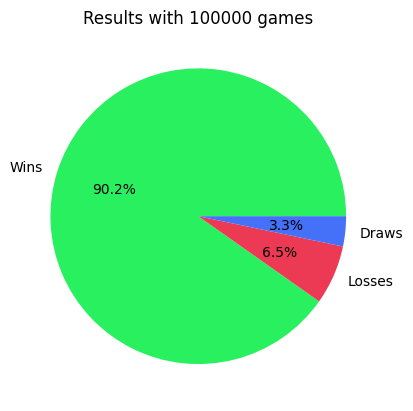

In [76]:
Q_table = defaultdict(list)
counter_w = 0
counter_l = 0
iterations = 100_000

for _ in tqdm(range(iterations)):
    winner, trajectory =  rl_game(Q_table)
    if winner == 1:
        counter_w += 1
    elif winner == 2:
        counter_l += 1
draw_pie_chart(counter_w, counter_l, iterations - counter_w - counter_l, f"Results with {iterations} games")

## RANDOM vs RL

In [99]:
def rl2_game(Q_table):
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    
    while available:
        o = choice(list(available))
        next_state = deepcopy(state)
        next_state.o.add(o)
        trajectory.append(deepcopy(next_state))
        available.remove(o)

        action = o
        reward = - state_value(next_state)
        update_Q_table(Q_table, (frozenset(state.x), frozenset(state.o)), action, reward, (frozenset(next_state.x), frozenset(next_state.o)))

        state = next_state

        if available:
            # Select an action
            action = select_action(Q_table, (frozenset(state.x), frozenset(state.o)))

            x = action
            next_state = deepcopy(state)
            next_state.x.add(x)
            trajectory.append(deepcopy(next_state))
            available.remove(x)

            reward = - state_value(next_state)
            update_Q_table(Q_table, (frozenset(state.x), frozenset(state.o)), action, reward, (frozenset(next_state.x), frozenset(next_state.o)))
        
            state = next_state

        # Check if there's a winner
        if win(state.x):
            return 1, trajectory
        elif win(state.o):
            return 2, trajectory

    # Draw
    return 0, trajectory

## SINGLE GAME

In [104]:
Q_table = defaultdict(list)
winner, trajectory =  rl2_game(Q_table)
print(winner)
print(trajectory)
print(Q_table)

2
[State(x=set(), o={2}), State(x={4}, o={2}), State(x={4}, o={2, 3}), State(x={1, 4}, o={2, 3}), State(x={1, 4}, o={2, 3, 5}), State(x={1, 4, 9}, o={2, 3, 5}), State(x={1, 4, 9}, o={8, 2, 3, 5}), State(x={1, 4, 9, 7}, o={8, 2, 3, 5})]
defaultdict(<class 'list'>, {(frozenset(), frozenset()): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset(), frozenset({2})): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset({4}), frozenset({2})): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset({4}), frozenset({2, 3})): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset({1, 4}), frozenset({2, 3})): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset({1, 4}), frozenset({2, 3, 5})): array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), (frozenset({1, 4, 9}), frozenset({2, 3, 5})): array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ]), (frozenset({1, 4, 9}), frozenset({8, 2, 3, 5})): array([0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ]), (frozenset({1, 4, 9, 7}), frozenset({8, 2, 3, 5})

## MULTIPLE GAMES

100%|██████████| 100000/100000 [00:48<00:00, 2083.06it/s]


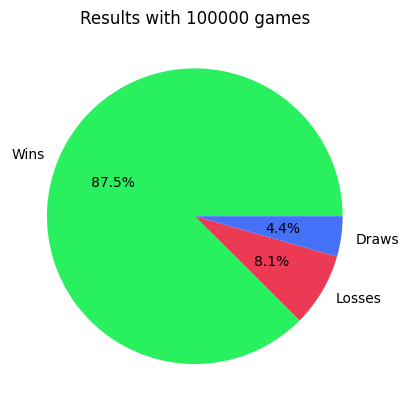

In [105]:
Q_table = defaultdict(list)
counter_w = 0
counter_l = 0
iterations = 100_000

for _ in tqdm(range(iterations)):
    winner, trajectory =  rl2_game(Q_table)
    if winner == 2:
        counter_w += 1
    elif winner == 1:
        counter_l += 1
draw_pie_chart(counter_w, counter_l, iterations - counter_w - counter_l, f"Results with {iterations} games")

In [30]:
def random_game():
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))
    while available:
        x = choice(list(available))
        state.x.add(x)
        trajectory.append(deepcopy(state))
        available.remove(x)
        if win(state.x) or not available:
            break

        o = choice(list(available))
        state.o.add(o)
        trajectory.append(deepcopy(state))
        available.remove(o)
        if win(state.o):
            break
    return trajectory

In [31]:
value_dictionary = defaultdict(float)
hit_state = defaultdict(int)
epsilon = 0.001

for steps in tqdm(range(500_000)):
    trajectory = random_game()
    final_reward = state_value(trajectory[-1])
    for state in trajectory:
        hashable_state = (frozenset(state.x), frozenset(state.o))
        hit_state[hashable_state] += 1
        value_dictionary[hashable_state] = value_dictionary[
            hashable_state
        ] + epsilon * (final_reward - value_dictionary[hashable_state])

  0%|          | 0/500000 [00:00<?, ?it/s]

100%|██████████| 500000/500000 [01:22<00:00, 6059.61it/s]


In [32]:
sorted(value_dictionary.items(), key=lambda e: e[1], reverse=True)[:10]

[((frozenset({1, 2, 3, 6, 8}), frozenset({4, 5, 7, 9})), 0.9172760676239365),
 ((frozenset({2, 3, 4, 6, 9}), frozenset({1, 5, 7, 8})), 0.9156040888197092),
 ((frozenset({1, 2, 3, 4, 8}), frozenset({5, 6, 7, 9})), 0.9151808403653648),
 ((frozenset({1, 5, 7, 8, 9}), frozenset({2, 3, 4, 6})), 0.9150959363016665),
 ((frozenset({2, 6, 7, 8, 9}), frozenset({1, 3, 4, 5})), 0.9147554693051785),
 ((frozenset({1, 6, 7, 8, 9}), frozenset({2, 3, 4, 5})), 0.9144136370292133),
 ((frozenset({2, 3, 5, 6, 8}), frozenset({1, 4, 7, 9})), 0.9144136370292133),
 ((frozenset({4, 5, 6, 7, 9}), frozenset({1, 2, 3, 8})), 0.9137258547177051),
 ((frozenset({2, 3, 6, 7, 9}), frozenset({1, 4, 5, 8})), 0.9132931868534693),
 ((frozenset({1, 4, 5, 6, 7}), frozenset({2, 3, 8, 9})), 0.9114521600198158)]

In [33]:
len(hit_state)

5477

In [34]:
def rl0_game():
    trajectory = list()
    state = State(set(), set())
    available = set(range(1, 9+1))

    while available:
        found = False
        for f in sorted(value_dictionary.items(), key=lambda e: e[1], reverse=True):
            if found:
                break

            if len(f[0][0]) + len(f[0][1]) == 9 - len(available) + 1 and state.x.issubset(f[0][0]):
                for v in f[0][0]:
                    if v not in state.x and v in available:
                        x = v
                        found = True
                        break
        
        state.x.add(x)
        trajectory.append(deepcopy(state))
        available.remove(x)
        if win(state.x) or not available:
            return 1

        o = choice(list(available))
        state.o.add(o)
        trajectory.append(deepcopy(state))
        available.remove(o)
        if win(state.o):
            return 2
    return 0

100%|██████████| 100000/100000 [21:11<00:00, 78.63it/s]


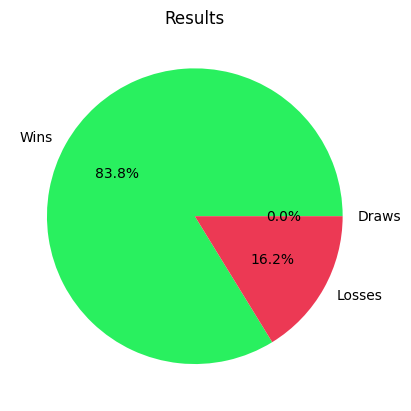

In [37]:
counter_w = 0
counter_l = 0
iterations = 100_000

for _ in tqdm(range(iterations)):
    winner =  rl0_game()
    if winner == 1:
        counter_w += 1
    elif winner == 2:
        counter_l += 1
draw_pie_chart(counter_w, counter_l, iterations - counter_w - counter_l, f"Results with {iterations} games")